### SnakeArcade_Game

In [21]:
from random import randint
from PIL import ImageTk, Image
import PIL.Image
import tkinter as tk
from IPython.display import Image
import warnings 
warnings.filterwarnings('ignore')

In [22]:
MOVE_INCREMENT = 21
MOVES_PER_SECOND = 18
GAME_SPEED = 270

In [23]:
class Snake(tk.Canvas):

    #init function to load the starting state of the game
    def __init__(self):
        super().__init__(
        width=600, height=620, background="black", highlightthickness=0
        )

        self.score=0
        self.snake_positions = [(100,100),(80,100),(60,100)]
        self.food_position = self.set_new_food_position()
        self.direction = "Right"
        self.bind_all("<Key>",self.on_key_press)

        self.load_assets()
        self.create_objects()

        self.pack()
        self.after(GAME_SPEED, self.perform_actions)

    #loading our assets - snake and food on the Canvas
    def load_assets(self):
        try:
            self.snake_body_image = PIL.Image.open("./assets/snake.png")
            self.snake_body = ImageTk.PhotoImage(self.snake_body_image)

            self.food_image = PIL.Image.open("./assets/food.png")
            self.food = ImageTk.PhotoImage(self.food_image)
        except IOError as error:
            print(error)
            root.destroy()

    #rendering the objects, score box and play area on the Canvas
    def create_objects(self):
        self.create_text(
            40,12,text=f"Score: {self.score}",tag="score",fill="#fff",font=10
        )

        for x_pos, y_pos in self.snake_positions:
            self.create_image(
                x_pos, y_pos, image=self.snake_body, tag="snake"
            )

        self.create_image(*self.food_position, image=self.food, tag="food")
        self.create_rectangle(7,27,593,613,outline="#525d69")

    #make our snake work for his food
    def set_new_food_position(self):
        while True:
            x_position = randint(1,29)*MOVE_INCREMENT
            y_position = randint(3,30)*MOVE_INCREMENT
            food_position = (x_position,y_position)

            if food_position not in self.snake_positions:
                return food_position

    # feeding our snake some snacks
    def check_food_collision(self):
        if self.snake_positions[0] == self.food_position:
            self.score +=1
            self.snake_positions.append(self.snake_positions[-1])

            self.create_image(
                *self.snake_positions[-1], image=self.snake_body, tag="snake"
            )

            self.food_position = self.set_new_food_position()
            self.coords(self.find_withtag("food"), *self.food_position)

            score = self.find_withtag("score")
            self.itemconfigure(score, text=f"Score: {self.score}",tag="score")

    #checking the conditions for game to end
    def check_collisions(self):
        head_x_pos, head_y_pos = self.snake_positions[0]

        return(
            head_x_pos in(0,600)
            or head_y_pos in (20,620)
            or (head_x_pos,head_y_pos) in self.snake_positions[1:]
        )

     #checking the users input
    def on_key_press(self,e):
        new_direction = e.keysym

        all_directions = ("Up", "Down", "Left", "Right")
        opposites = ({"Up","Down"}, {"Left", "Right"})

        if(new_direction in all_directions and {new_direction,self.direction} not in opposites):
            self.direction = new_direction

    #animating our snake :3
    def move_snake(self):
        head_x_pos, head_y_pos = self.snake_positions[0]

        if self.direction == "Left":
            new_head_positon = (head_x_pos-MOVE_INCREMENT, head_y_pos)
        elif self.direction == "Right":
            new_head_positon = (head_x_pos+MOVE_INCREMENT, head_y_pos)
        elif self.direction == "Down":
            new_head_positon = (head_x_pos, head_y_pos+MOVE_INCREMENT)
        elif self.direction == "Up":
            new_head_positon = (head_x_pos, head_y_pos-MOVE_INCREMENT)


        self.snake_positions = [new_head_positon] + self.snake_positions[:-1]

        for segment, position in zip(self.find_withtag("snake"), self.snake_positions):
            self.coords(segment,position)

    #performing actions based on user input
    def perform_actions(self):
        if self.check_collisions():
            self.end_game()

        self.check_food_collision()
        self.move_snake()
        self.after(GAME_SPEED, self.perform_actions)

    #end game
    def end_game(self):
        self.delete(tk.ALL)
        self.create_text(
            self.winfo_width() / 2,
            self.winfo_height() / 2,
            text=f"Game Over! You Scored {self.score}!",
            fill="#fff",
            font=("",10)
        )


In [25]:
if __name__ == '__main__':

    root = tk.Tk()
    root.title("Snake Arcade")
    root.resizable(False, False)
    root.tk.call("tk", "scaling", 4.0)

    board = Snake()

    root.mainloop()

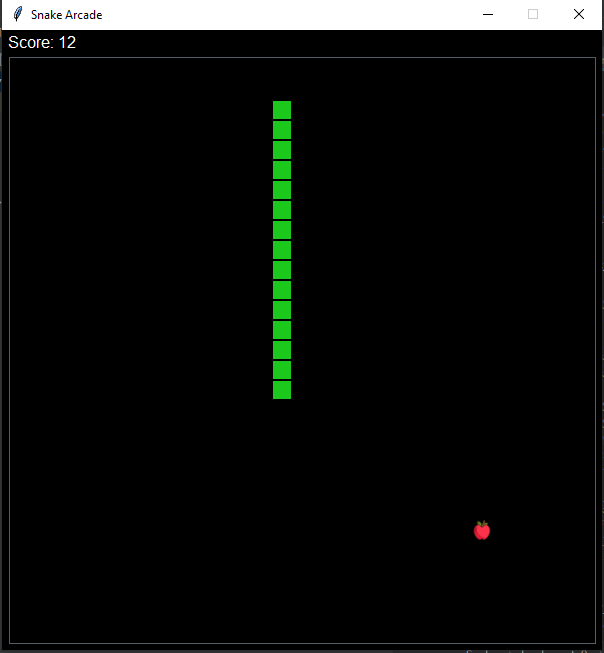

In [13]:
#Display the output Window
Image(filename='SnakeArcade_Game_img.png',width=400, height=400)